In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
wikipedia_df = pd.read_csv('../data/wiki_earthquakes_clean.csv')

In [15]:
#dropping previous index column
wikipedia_df.drop(columns='Unnamed: 0', inplace=True)

In [17]:
#reverting back to datetime
wikipedia_df['origin_utc'] = pd.to_datetime(wikipedia_df['origin_utc'])

In [20]:
#all death columns except 'deaths_total'
wikipedia_df.drop(columns=['pde_shaking_deaths', 'pde_total_deaths', 'utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths'], inplace=True)

In [21]:
wikipedia_df.head()

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
0,1900-05-11 17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0.0
1,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,140.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,0.0,6.5,NaN,0.0
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,4.0


In [58]:
wikipedia_df.nlargest(columns = 'death_total', n=10)

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
583,1976-07-27 19:42:00,China,39.605,117.888,16.7,7.6,NaN,655237.0
1237,2004-12-26 00:58:00,Indonesia,3.287,95.972,30.0,9.1,"T,L",297200.0
102,1920-12-16 12:05:00,China,36.601,105.317,25.0,8.6,NaN,235502.0
1327,2010-01-12 17:00:00,Haiti,18.457,-72.533,13.0,7.0,NaN,222517.0
140,1927-05-22 22:32:00,China,37.386,102.311,25.0,7.9,NaN,200000.0
116,1923-09-01 02:58:00,Japan,35.405,139.084,35.0,7.9,"T,F",143000.0
302,1948-10-05 20:12:00,Turkmenistan,37.500,58.000,0.0,7.2,NaN,110000.0
1307,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,88287.0
1252,2005-10-08 03:50:00,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351.0
41,1908-12-28 04:20:00,Italy,38.000,15.500,0.0,7.2,T,82000.0


In [60]:
wikipedia_df.nsmallest(columns = 'death_total', n=10)

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
0,1900-05-11 17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,0.0,6.5,NaN,0.0
5,1901-08-09 09:23:00,Japan,40.5,142.5,35.0,7.2,T,0.0
11,1902-07-03 15:36:00,China,43.2,129.6,20.0,6.7,NaN,0.0
28,1905-11-08 22:06:00,Greece,40.0,24.0,0.0,6.8,NaN,0.0
44,1909-02-09 11:24:00,Turkey,40.0,38.0,60.0,6.8,NaN,0.0
62,1912-01-24 16:23:00,Greece,38.0,20.5,60.0,6.8,NaN,0.0
64,1912-05-23 02:24:00,Burma,21.0,97.0,0.0,7.7,NaN,0.0
67,1913-03-14 08:45:00,Indonesia,4.5,126.5,0.0,7.9,T,0.0


In [62]:
wikipedia_df['death_total'].mean()

2354.444776119403

In [70]:
wikipedia_df[wikipedia_df['death_total'] == 0]

,origin_utc,country,lat,long,depth_km,magnitude,secondary_effects,death_total
0,1900-05-11 17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0.0
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,0.0
3,1901-02-15 00:00:00,China,26.0,100.1,0.0,6.5,NaN,0.0
5,1901-08-09 09:23:00,Japan,40.5,142.5,35.0,7.2,T,0.0
11,1902-07-03 15:36:00,China,43.2,129.6,20.0,6.7,NaN,0.0
...,...,...,...,...,...,...,...,...
1318,2008-10-06 16:30:00,China,NaN,NaN,NaN,6.4,NaN,0.0
1322,2009-07-09 11:19:00,China,NaN,NaN,NaN,5.7,NaN,0.0
1333,2011-03-10 04:58:00,China,NaN,NaN,NaN,5.4,NaN,0.0
1336,2011-04-07 14:32:00,Japan,38.2,140.0,66.0,7.1,NaN,0.0


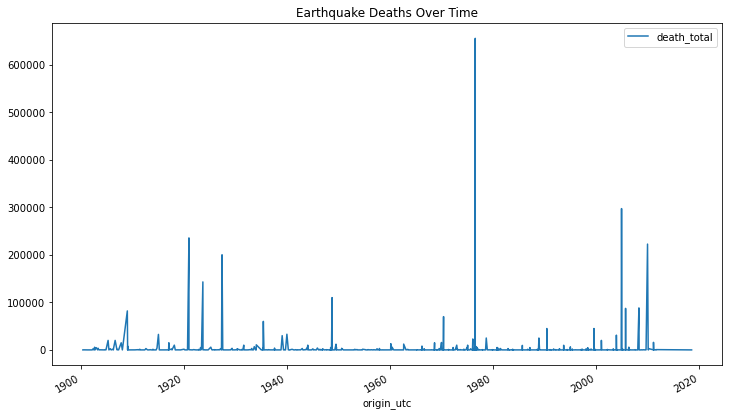

In [40]:
wikipedia_df.plot.line('origin_utc', 'death_total', figsize=(12,7), title='Earthquake Deaths Over Time');

In [88]:
#grouping by country and taking a sum of death_total
wikipedia_df.groupby('country')['death_total'].sum().sort_values(ascending=False)

country
China        1284382.0
Indonesia     343574.0
Haiti         222523.0
Japan         185148.0
Iran          177960.0
               ...    
Spain              1.0
Rwanda             1.0
Brazil             1.0
Eritrea            0.0
Mongolia           0.0
Name: death_total, Length: 106, dtype: float64

In [90]:
#mean deaths by country
wikipedia_df.groupby('country')['death_total'].mean()

country
Afghanistan          339.966667
Albania               34.857143
Algeria              446.000000
Argentina            962.181818
Armenia            12695.000000
                       ...     
Venezuela             32.818182
Vietnam                1.000000
WallisandFutuna        5.000000
Yemen               1337.000000
Yugoslavia            12.000000
Name: death_total, Length: 106, dtype: float64

In [95]:
wikipedia_df.groupby('country')['magnitude'].mean().sort_values(ascending=False).head(15)

country
Samoa                           8.100000
Mongolia                        8.100000
SolomonIslands                  7.720000
TajikSovietSocialistRepublic    7.600000
Martinique                      7.400000
Chile                           7.377273
PuertoRico                      7.300000
SaintPierreandMiquelon          7.300000
SaudiArabia/Egypt               7.200000
Mexico                          7.117391
Turkmenistan                    7.100000
RussianFederation               7.030769
Japan                           7.021951
Mozambique                      7.000000
Kyrgyzstan                      7.000000
Name: magnitude, dtype: float64

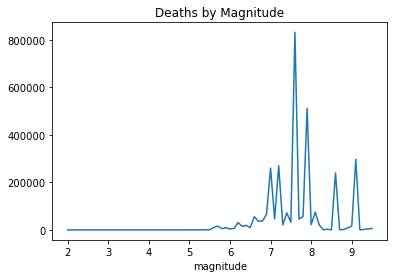

In [87]:
wikipedia_df.groupby('magnitude')['death_total'].sum().plot.line(title='Deaths by Magnitude');

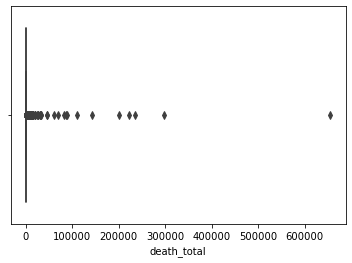

In [115]:
sns.boxplot(x=wikipedia_df['death_total']);

In [125]:
#new dataframe with zero deaths removed and large outliers
deaths_greater_than_zero = wikipedia_df[
    (wikipedia_df['death_total'] > 2000)&
    (wikipedia_df['death_total'] < 100000)
]

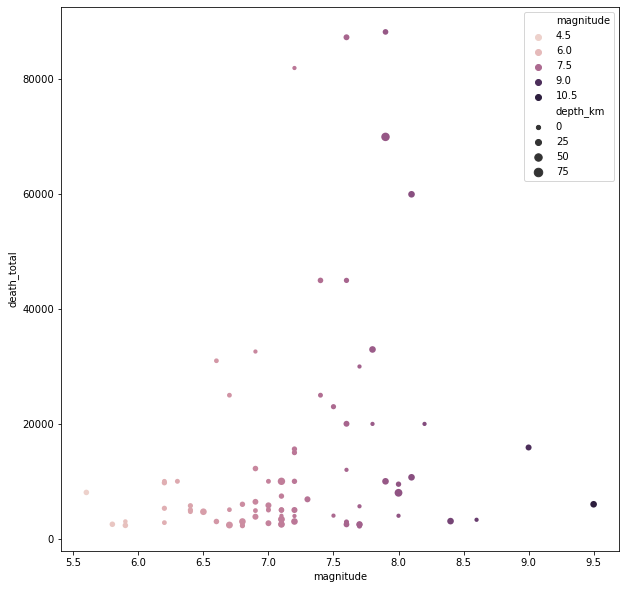

In [126]:
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 10))
magnitude_ranking = deaths_greater_than_zero['magnitude']
sns.scatterplot(x="magnitude", y="death_total",
                hue="magnitude", size='depth_km',
                hue_order=magnitude_ranking, linewidth=0,
                data=deaths_greater_than_zero, ax=ax);

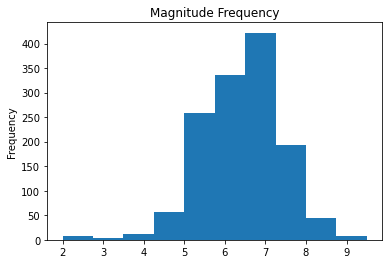

In [129]:
wikipedia_df['magnitude'].plot(kind='hist', title='Magnitude Frequency');

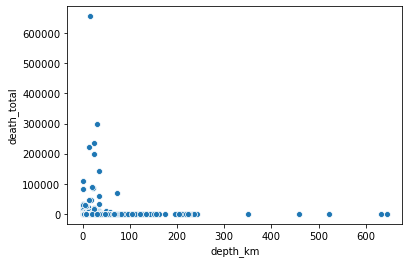

In [133]:
sns.scatterplot(x='depth_km', y='death_total', data=wikipedia_df)